# Работа с базами данных из Python

## SQLite

### Основы

Создаем базу и табличку в ней

In [1]:
import sqlite3
 
conn = sqlite3.connect( "mydatabase.db" ) # файл
# conn = sqlite3.connect ( ":memory:" ) # RAM
cursor = conn.cursor()

# Создание таблицы
cursor.execute( "CREATE TABLE testtable ( id int, val text )" )

# Вставляем данные в таблицу
cursor.execute( "INSERT INTO testtable ( id, val ) VALUES ( 1, 'One' ) " )
cursor.execute( "INSERT INTO testtable ( id, val ) VALUES ( 2, 'Two' ) " )
 
# Сохраняем изменения
conn.commit()

# Закрываем курсор и соединение
cursor. close()
conn.close()


Читаем данные из базы разными способами

In [2]:
import sqlite3
 
conn = sqlite3.connect( "mydatabase.db" ) # файл
# conn = sqlite3.connect ( ":memory:" ) # RAM
cursor = conn.cursor()

# Чтение таблицы 1
print("Ex 1")
sql = "SELECT * FROM testtable"
cursor.execute( sql )
print( "fetchall():", cursor.fetchall() ) # все строки разом

# Чтение таблицы 2
print("\nEx 2")
cursor.execute( sql )
row = cursor.fetchone() # по одной строке
while row is not None:
  print( "row", row )
  row = cursor.fetchone()

# Чтение таблицы 3
print("\nEx 3")
for i, row in enumerate(cursor.execute( sql )):
    print( "row", i+1, row )
 
# Закрываем курсор и соединение
cursor. close()
conn.close()


Ex 1
fetchall(): [(1, 'One'), (2, 'Two')]

Ex 2
row (1, 'One')
row (2, 'Two')

Ex 3
row 1 (1, 'One')
row 2 (2, 'Two')


А теперь попробуем загрузить в базу наш файл sales.csv

In [3]:
import sqlite3
 
conn = sqlite3.connect( "mydatabase.db" ) # файл
# conn = sqlite3.connect ( ":memory:" ) # RAM
cursor = conn.cursor()

# Создание таблицы
cursor.execute( "CREATE TABLE sales ( date text, sales text, category text, additional text)" )

# открываем файл
file = open("sales.csv", encoding='utf8')

for i, row in enumerate(file):
    if i == 0:
        continue
    data = row.split(';')
    sql = f"INSERT INTO sales ( date, sales, category, additional ) VALUES ( '{data[0]}', '{data[1]}', '{data[2]}', '{data[3]}' ) "
    # print(sql)
    cursor.execute( sql )

# закрываем файл
file.close()

sql = "SELECT * FROM sales"
for i, row in enumerate(cursor.execute( sql )):
    print( "row", i+1, row )

# Сохраняем изменения
conn.commit()

# Закрываем курсор и соединение
cursor. close()
conn.close()


row 1 ('01.01.2022 0:00', '150', 'Электроника', 'доставить вПВЗ\n')
row 2 ('01.01.2022 0:00', '123', 'Одежда', 'доставить в ПВЗ\n')
row 3 ('01.01.2022 0:00', '321', 'Электроника', 'самовывоз..\n')
row 4 ('01.01.2022 0:00', '111', 'Одежда', 'доставить- ПВЗ\n')
row 5 ('02.01.2022 0:00', '222', 'Электроника', '\n')
row 6 ('03.01.2022 0:00', '333', 'Одежда', 'смовывоз\n')
row 7 ('04.01.2022 0:00', 'NaN', 'Электроника', 'доставить в ПВЗ\n')
row 8 ('05.01.2022 0:00', '999', 'Одежда', 'доставить в ПВЗ\n')
row 9 ('06.01.2022 0:00', '888', 'Электроника', '\n')


Проведем сравнительный эксперимент на производительность: физический файл против RAM

In [4]:
%%time
import sqlite3
 
conn = sqlite3.connect( "mydatabase.db" ) # файл
# conn = sqlite3.connect ( ":memory:" ) # RAM
cursor = conn.cursor()

# Создание таблицы
cursor.execute( "CREATE TABLE big_sales ( date text, sales text, category text, additional text)" )

# открываем файл
file = open("big_sales.csv", encoding='utf8')

for i, row in enumerate(file):
    if i == 0:
        continue
    data = row.split(';')
    sql = f"INSERT INTO big_sales ( date, sales, category, additional ) VALUES ( '{data[0]}', '{data[1]}', '{data[2]}', '{data[3]}' ) "
    # print(sql)
    cursor.execute( sql )

# закрываем файл
file.close()

sql = "SELECT * FROM big_sales"
cursor.execute( sql )
lst = cursor.fetchall() 
print(len(lst))

# Сохраняем изменения
conn.commit()

# Закрываем курсор и соединение
cursor. close()
conn.close()

109053
CPU times: total: 969 ms
Wall time: 1.06 s


In [5]:
%%time
import sqlite3
 
# conn = sqlite3.connect( "mydatabase.db" ) # файл
conn = sqlite3.connect ( ":memory:" ) # RAM
cursor = conn.cursor()

# Создание таблицы
cursor.execute( "CREATE TABLE big_sales ( date text, sales text, category text, additional text)" )

# открываем файл
file = open("big_sales.csv", encoding='utf8')

for i, row in enumerate(file):
    if i == 0:
        continue
    data = row.split(';')
    sql = f"INSERT INTO big_sales ( date, sales, category, additional ) VALUES ( '{data[0]}', '{data[1]}', '{data[2]}', '{data[3]}' ) "
    # print(sql)
    cursor.execute( sql )

# закрываем файл
file.close()

sql = "SELECT * FROM big_sales"
cursor.execute( sql )
lst = cursor.fetchall() 
print(len(lst))

# Сохраняем изменения
conn.commit()

# Закрываем курсор и соединение
cursor. close()
conn.close()

109053
CPU times: total: 969 ms
Wall time: 1.01 s


Как видим, большого преимущества от использования im-memory database на таком относительно маленьком объеме данных - нет.

### sqlite3

Интересная фича SQLite - легковесный консольный клиент sqlite3 

Скачать - https://www.sqlite.org/download.html

Документация - https://www.rldp.ru/sqlite/sqlite344/cli.html 

Простейшие команды:
* .help - *справка*
* sqlite3.exe tst.db - *открыть базу данных и консоль для нее*
* .separator ";" - *установить разделитель*
* .import big_sales.csv big_sales - *импортировать csv и создать на ее основе таблице sales*
* .headers on - *включить вывод заголовков*
* .once for_upload.csv - *перенаправить вывод из консоли в файл*

Давайте попробуем привести файл к нужному нам виду (как в прошлом уроке) и сохранить его в новый файл for_upload.csv

In [ ]:
select substr(date, 1, 10) date, case when sales = 'NaN' then 0 else sales end sales, category
from big_sales;

Кое-какую статистику, кстати, можно посчитать и в базе данных, если по какой-то причине поставить pandas нельзя

In [ ]:
select
  count(*) as sales_count,
  cast(sum(sales) as integer) as sum,
  cast(min(sales) as integer) as min,
  cast(max(sales) as integer) as max,
  cast(avg(sales) as integer) as mean,
  cast(median(sales) as integer) as median,
  mode(sales) as mode
from (select cast(sales as int) sales from big_sales);

## PostgreSQL

### Основы

Запуск контейнера Docker из образа:

*docker run --name postgres_cont -p 5432:5432 -e POSTGRES_PASSWORD=postgres -d postgres*

Остановка и повторный запуск:

*docker stop postgres_cont*

*docker start postgres_cont*


In [6]:
# подключимся к развернутой базе данных
import psycopg2

# Создание подключения к PostgreSQL
conn = psycopg2.connect(database = "postgres",
                        host =     "localhost",
                        user =     "postgres",
                        password = "postgres",
                        port =     "5432")

# Отключение автокоммита
conn.autocommit = False

# Создание курсора
cursor = conn.cursor()

####################################################

# Создание таблицы внутри базы данных
cursor.execute( "CREATE TABLE public.testtable( id int, val varchar(20))" )

# Выполнение SQL кода в базе данных без возврата результата
cursor.execute( "INSERT INTO public.testtable( id, val ) VALUES ( 1, 'ABC' ), ( 2, 'DEF' )" )
conn.commit()

# Выполнение SQL кода в базе данных с возвратом результата
cursor.execute( "SELECT * FROM public.testtable" )
records = cursor.fetchall()

for i, row in enumerate(records):
	print( i, '-', row )

# Закрываем соединение
cursor.close()
conn.close()


0 - (1, 'ABC')
1 - (2, 'DEF')


Теперь загрузим в Postgres наш файлик с данными о продажах и прочитаем его

In [11]:
%%time
# попробуем загрузать в базу наш файлик
import psycopg2

# Создание подключения к PostgreSQL
conn = psycopg2.connect(database = "postgres",
                        host =     "localhost",
                        user =     "postgres",
                        password = "postgres",
                        port =     "5432")

# Отключение автокоммита
conn.autocommit = False

# Создание курсора
cursor = conn.cursor()

####################################################

# Создание таблицы внутри базы данных
cursor.execute( "DROP TABLE if exists public.big_sales CASCADE" )
cursor.execute( "CREATE TABLE if not exists public.big_sales( date date, sales int, category varchar(20), additional varchar(100) )" )

file = open("big_sales.csv", encoding='utf8')
for i, row in enumerate(file):
    if i==0: continue
    data = row.split(';')
    # Выполнение SQL кода в базе данных без возврата результата
    sql = f"INSERT INTO public.big_sales( date, sales, category, additional) VALUES ( to_date('{data[0]}','DD.MM.YYYY HH24:MI'), {data[1].replace('NaN','0')}, '{data[2]}', '{data[3].strip()}' )"
    cursor.execute( sql )

conn.commit()
file.close()

# Выполнение SQL кода в базе данных с возвратом результата
cursor.execute( "SELECT * FROM public.big_sales" )
records = cursor.fetchall()

print(len(records))

# Закрываем соединение
cursor.close()
conn.close()


109053
CPU times: total: 1.17 s
Wall time: 1min 23s


***Важный вопрос:*** Станет ли быстрее, если поместить commit() внутрь цикла?

Теперь попробуем подружить PostgreSQL и Pandas и сравним производительность

In [ ]:
%%time
# попробуем загрузать в базу наш файлик
import psycopg2
import pandas as pd

# Создание подключения к PostgreSQL
conn = psycopg2.connect(database = "postgres",
                        host =     "localhost",
                        user =     "postgres",
                        password = "postgres",
                        port =     "5432")

# Отключение автокоммита
conn.autocommit = False

# Создание курсора
cursor = conn.cursor()

####################################################

# Создание таблицы внутри базы данных
cursor.execute( "DROP TABLE if exists public.big_sales CASCADE" )
cursor.execute( "CREATE TABLE if not exists public.big_sales( date date, sales int, category varchar(20), additional varchar(100) )" )

# Чтение из файла
df = pd.read_csv( 'big_sales.csv', sep=';', header=0, index_col=None )
df["sales"] = df["sales"].fillna(0)
df["additional"] = df["additional"].str.strip()
# Выполнение SQL кода в базе данных без возврата результата
sql = "INSERT INTO public.big_sales( date, sales, category, additional) VALUES ( to_date(%s,'DD.MM.YYYY HH24:MI'), %s, %s, %s )"
cursor.executemany(sql, df.values.tolist())

conn.commit()

# Выполнение SQL кода в базе данных с возвратом результата
cursor.execute( "SELECT * FROM public.big_sales" )
records = cursor.fetchall()

print(len(records))

# Закрываем соединение
cursor.close()
conn.close()

109053
CPU times: total: 2 s
Wall time: 1min 28s


Попробуем теперь сохранить данные в excel, например для отчета, прямо из базы данных.

Для этого будет необходимо сформировать df из курсора базы данных.

А что хранится внутри курсора?

In [10]:
%%time
# попробуем загрузать в базу наш файлик
import psycopg2
import pandas as pd

# Создание подключения к PostgreSQL
conn = psycopg2.connect(database = "postgres",
                        host =     "localhost",
                        user =     "postgres",
                        password = "postgres",
                        port =     "5432")

# Отключение автокоммита
conn.autocommit = False

# Создание курсора
cursor = conn.cursor()

# Выполнение SQL кода в базе данных с возвратом результата
cursor.execute( "SELECT * FROM public.big_sales" )
records = cursor.fetchall()
names = [ x[0] for x in cursor.description ]
df = pd.DataFrame( records, columns = names )
df["additional"] = df["additional"].str.replace('NaN','')
df.to_excel('big_sales.xlsx', sheet_name='list1', header=True, index=False)

# Закрываем соединение
cursor.close()
conn.close()

CPU times: total: 11.9 s
Wall time: 12.5 s


### psql

Вы также можете установить локально сервер БД PostgreSQL, скачав его с официального сайта - https://www.postgresql.org/download/ .

Если вы хотите установить только psql клиент и подключаться к удаленной базе данных, то при установке выберите Сommand Line Tools

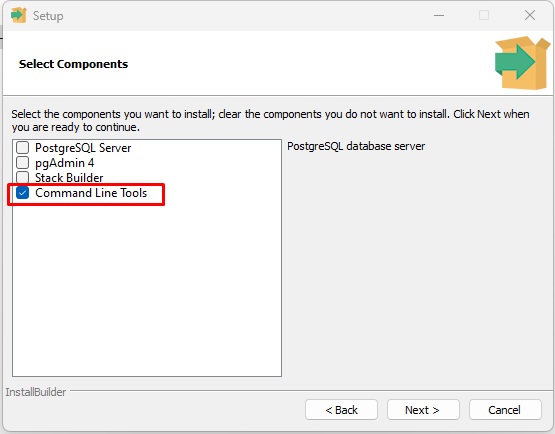

Подключиться через psql к удаленной базе данных можно командой:

*psql -h localhost -p 5432 -d postgres -U postgres*

Команды:
* \\? - общий help
* \h - help по командам
* \d - перечень таблиц
* \d big_sales - описание таблицы

Импорт данных из csv:

*\COPY big_sales FROM 'big_sales.csv' DELIMITER ';' CSV HEADER;*

Экспорт данных в csv:

*\COPY big_sales TO 'new_big_sales.csv' WITH CSV DELIMITER ';' HEADER;*